# Recommendation System Using Collaborative filtering

Importing Libaries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings('ignore')
from scipy.sparse import csr_matrix
import seaborn as sns


Collecting and Viewing datasets

In [2]:
books=pd.read_csv("Books[1].csv",delimiter=",")
users=pd.read_csv("Users[1].csv",delimiter=",")
ratings=pd.read_csv("Ratings[1].csv",delimiter=",")

In [3]:
#reading book datasets
books.head(5)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
# reading users datasets
users.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
#reading ratings datasets
ratings.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6



# **Exploratory Data Analysis**


*   Using the cells below to provide some insight into the descriptive statistics of the data








In [6]:
#checking shapes of datasets
print("BOOK",books.shape)
print("USERS",users.shape)
print("RATINGS",ratings.shape)

BOOK (271360, 8)
USERS (278858, 3)
RATINGS (1149780, 3)


## BOOKS 
Trying to read books dataset like publisher ,year of publication so to get so more clue and a clear picture to move forward

In [7]:
#null values
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [8]:
continuousVars = ['ISBN']
books[continuousVars].describe()


,ISBN
count,271360
unique,271360
top,074939918X
freq,1


In [9]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [10]:
#checking book title with no publisher
#'publisher' column
books.loc[books.Publisher.isnull(),:]


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [11]:
books.loc[(books['Book-Title'] == 'Finders Keepers'),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
10799,082177364X,Finders Keepers,Fern Michaels,2002,Zebra Books,http://images.amazon.com/images/P/082177364X.0...,http://images.amazon.com/images/P/082177364X.0...,http://images.amazon.com/images/P/082177364X.0...
42019,0070465037,Finders Keepers,Barbara Nickolae,1989,McGraw-Hill Companies,http://images.amazon.com/images/P/0070465037.0...,http://images.amazon.com/images/P/0070465037.0...,http://images.amazon.com/images/P/0070465037.0...
58264,0688118461,Finders Keepers,Emily Rodda,1993,Harpercollins Juvenile Books,http://images.amazon.com/images/P/0688118461.0...,http://images.amazon.com/images/P/0688118461.0...,http://images.amazon.com/images/P/0688118461.0...
66678,1575663236,Finders Keepers,Fern Michaels,1998,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575663236.0...,http://images.amazon.com/images/P/1575663236.0...,http://images.amazon.com/images/P/1575663236.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
134309,0156309505,Finders Keepers,Will,1989,Voyager Books,http://images.amazon.com/images/P/0156309505.0...,http://images.amazon.com/images/P/0156309505.0...,http://images.amazon.com/images/P/0156309505.0...
173473,0973146907,Finders Keepers,Sean M. Costello,2002,Red Tower Publications,http://images.amazon.com/images/P/0973146907.0...,http://images.amazon.com/images/P/0973146907.0...,http://images.amazon.com/images/P/0973146907.0...
195885,0061083909,Finders Keepers,Sharon Sala,2003,HarperTorch,http://images.amazon.com/images/P/0061083909.0...,http://images.amazon.com/images/P/0061083909.0...,http://images.amazon.com/images/P/0061083909.0...
211874,0373261160,Finders Keepers,Elizabeth Travis,1993,Worldwide Library,http://images.amazon.com/images/P/0373261160.0...,http://images.amazon.com/images/P/0373261160.0...,http://images.amazon.com/images/P/0373261160.0...


In [12]:
books.loc[(books['Book-Author'] == 'Elaine Corvidae'),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
126762,1931696934,Winter's Orphans,Elaine Corvidae,2001,Novelbooks,http://images.amazon.com/images/P/1931696934.0...,http://images.amazon.com/images/P/1931696934.0...,http://images.amazon.com/images/P/1931696934.0...
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129001,0759901880,Wolfkin,Elaine Corvidae,2001,Hard Shell Word Factory,http://images.amazon.com/images/P/0759901880.0...,http://images.amazon.com/images/P/0759901880.0...,http://images.amazon.com/images/P/0759901880.0...


publisher column isn't helpful much as books have different publishers as well as authors


In [13]:
#number of books with above book title
books.loc[(books['Book-Title'] == 'Tyrant Moon'),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...


In [14]:
#after reading book dataset come to conclusion that fews columns are just increasing the number of columns dropping them out
books.drop(['Publisher','Image-URL-S', 'Image-URL-M', 'Image-URL-L','Year-Of-Publication'],axis=1,inplace=True)

#NEW BOOK TABLE


In [15]:

books.head()

,ISBN,Book-Title,Book-Author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
4,0393045218,The Mummies of Urumchi,E. J. W. Barber


## Analysis the users datasets


checking whether users dataset have any null values or  not

In [16]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [17]:
users.dtypes


User-ID       int64
Location     object
Age         float64
dtype: object

In [18]:
# Replacing NaN values  with mean
users.Age = users.Age.fillna(users.Age.mean())

In [19]:
users['Age'].isnull().sum()
#no nan value found

0

In [20]:
print(sorted(users.Age.unique()))


[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 34.75143370454978, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0

Viewing age distribution using Histogram just to be clear which age group have contributed in rating more

Text(0, 0.5, 'No of Counts')

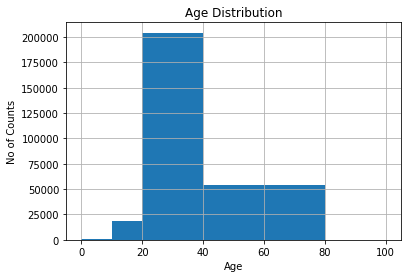

In [21]:
users.Age.hist(bins=[0,10,20,40,80,100])
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("No of Counts")

From above graph Age group between 20 -40 have contributed more.
According to me age is not playing any important role in finding recommendation

#NEW USER TABLE

In [22]:
users=users.drop('Age',axis=1)

Analysis ratings datasets


In [23]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [24]:
ratings.shape

(1149780, 3)

In [25]:
continuousVars = ['Book-Rating']
ratings[continuousVars].describe()

,Book-Rating
count,1.149780e+06
mean,2.866950e+00
std,3.854184e+00
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,7.000000e+00
max,1.000000e+01


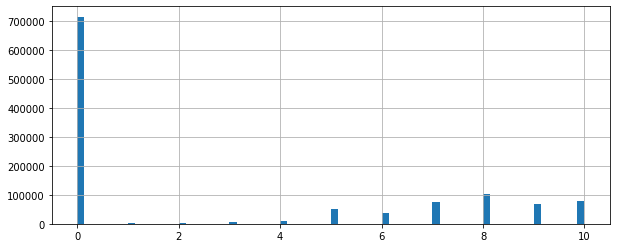

In [26]:
plt.figure(figsize=(10,4))
ratings['Book-Rating'].hist(bins=70)

clearly above fig shows most of the people haven't given any rating i.e 0

In [27]:
ratings['Book-Rating'].value_counts()

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

In [28]:
ratings['User-ID'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
158698        1
17920         1
277135        1
275086        1
187812        1
Name: User-ID, Length: 105283, dtype: int64

In [29]:

ratings['Book-Rating'].unique()


array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [30]:
# Ratings should be of the books present in book datasets
ratingsn = ratings[ratings.ISBN.isin(books.ISBN)]

In [31]:
print("rating after checking with book datasets",ratingsn.shape)
print("original rating data",ratings.shape)

rating after checking with book datasets (1031136, 3)
original rating data (1149780, 3)


**Ratings is the important column** 
here we gonna divide the ratings in zero and non zero ratings



In [32]:
# implicit and explict ratings datasets
ratings_explicit = ratingsn[ratingsn['Book-Rating'] != 0]
ratings_implicit = ratingsn[ratingsn['Book-Rating'] == 0]

In [33]:
print(ratings_explicit.shape)
print(ratings_implicit.shape)

(383842, 3)
(647294, 3)


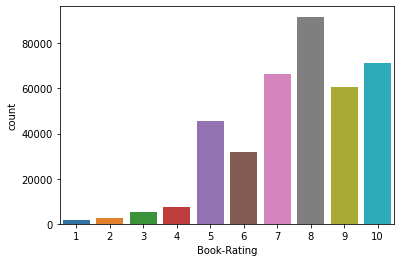

In [34]:
sns.countplot(data=ratings_explicit , x='Book-Rating')
plt.show()

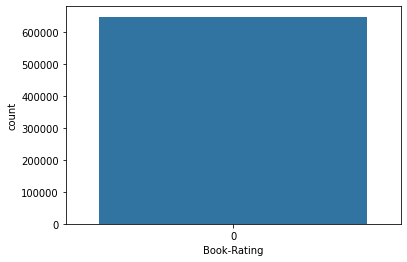

In [35]:
sns.countplot(data=ratings_implicit , x='Book-Rating')
plt.show()

## Collaborative Filtering

In [36]:
#the dataset is bigger, to make my program run a bit faster i will consider users you have rated more than 200 books and will consider the books with 
#at least min of 200 ratings.
c1 = ratings['User-ID'].value_counts()
ratings= ratings[ratings['User-ID'].isin(c1[c1 >= 200].index)]
c2 = ratings['Book-Rating'].value_counts()
ratings = ratings[ratings['Book-Rating'].isin(c2[c2 >= 200].index)]

In [37]:
ratings.shape

(527556, 3)

#Merging Books and Ratings dataset on ISBN

In [38]:
booktable=pd.merge(books,ratings,on="ISBN")
booktable.head(5)

,ISBN,Book-Title,Book-Author,User-ID,Book-Rating
0,0002005018,Clara Callan,Richard Bruce Wright,11676,8
1,0002005018,Clara Callan,Richard Bruce Wright,85526,0
2,0002005018,Clara Callan,Richard Bruce Wright,96054,0
3,0002005018,Clara Callan,Richard Bruce Wright,177458,0
4,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,110912,10


In [39]:
bookratingCount = (booktable.
     groupby(by = ['Book-Title'])['Book-Rating'].
     count().
     reset_index().
     rename(columns = {'Book-Rating': 'TotalRatingCount'})
     [['Book-Title', 'TotalRatingCount']]
    )
bookratingCount.head()

,Book-Title,TotalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


Merging the above two table (bookrating count,booktable) on column book title 

In [40]:
table=booktable.merge(bookratingCount,left_on = 'Book-Title', right_on = 'Book-Title', how = 'left')
table.head()

,ISBN,Book-Title,Book-Author,User-ID,Book-Rating,TotalRatingCount
0,0002005018,Clara Callan,Richard Bruce Wright,11676,8,4
1,0002005018,Clara Callan,Richard Bruce Wright,85526,0,4
2,0002005018,Clara Callan,Richard Bruce Wright,96054,0,4
3,0002005018,Clara Callan,Richard Bruce Wright,177458,0,4
4,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,110912,10,3


In [41]:
table.shape

(488742, 6)

In [42]:
bookratingCount['TotalRatingCount'].describe()
#rating count is too high

count    160576.000000
mean          3.043680
std           7.428434
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         365.000000
Name: TotalRatingCount, dtype: float64

Dataset is still large just to be more accurate and simple we will consider data with at least threshold value of totalrating count.

In [43]:
#threshold value is  fixed only above and equal to it dataset will be considered
threshold=125
table_rating=table.query('TotalRatingCount>=@threshold')
table_rating.head(5)

,ISBN,Book-Title,Book-Author,User-ID,Book-Rating,TotalRatingCount
24,0440234743,The Testament,John Grisham,277478,0,182
25,0440234743,The Testament,John Grisham,2977,0,182
26,0440234743,The Testament,John Grisham,3363,0,182
27,0440234743,The Testament,John Grisham,7346,9,182
28,0440234743,The Testament,John Grisham,9856,0,182


In [44]:
#previous table
print(table.shape)
#filtered table
print(table_rating.shape)


(488742, 6)
(14506, 6)


We will join user table with our table_rating

In [45]:
utable_rating=table_rating.merge(users, left_on='User-ID',right_on='User-ID',how='left')
utable_rating

,ISBN,Book-Title,Book-Author,User-ID,Book-Rating,TotalRatingCount,Location
0,0440234743,The Testament,John Grisham,277478,0,182,"schiedam, zuid-holland, netherlands"
1,0440234743,The Testament,John Grisham,2977,0,182,"richland, washington, usa"
2,0440234743,The Testament,John Grisham,3363,0,182,"knoxville, tennessee, usa"
3,0440234743,The Testament,John Grisham,7346,9,182,"sunnyvale, california, usa"
4,0440234743,The Testament,John Grisham,9856,0,182,"glendale, colorado, usa"
...,...,...,...,...,...,...,...
14501,080410526x,All I Really Need to Know,ROBERT FULGHUM,91832,0,127,"miami, florida, usa"
14502,B00008WFXL,The Da Vinci Code,Dan Brown,164533,0,226,"sitges, barcelona, spain"
14503,0694525057,Mystic River,Dennis Lehane,233911,0,130,"romney, west virginia, usa"
14504,0060093102,Mystic River,Dennis Lehane,238120,0,130,"louisville, kentucky, usa"


Dataset can have Duplicate Value as well 
checking duplicates

In [46]:
#checking the duplicates in above table
utable_rating=utable_rating.drop_duplicates(["User-ID","Book-Title","Book-Author"])

In [47]:
utable_rating
#duplicates have been dropped

,ISBN,Book-Title,Book-Author,User-ID,Book-Rating,TotalRatingCount,Location
0,0440234743,The Testament,John Grisham,277478,0,182,"schiedam, zuid-holland, netherlands"
1,0440234743,The Testament,John Grisham,2977,0,182,"richland, washington, usa"
2,0440234743,The Testament,John Grisham,3363,0,182,"knoxville, tennessee, usa"
3,0440234743,The Testament,John Grisham,7346,9,182,"sunnyvale, california, usa"
4,0440234743,The Testament,John Grisham,9856,0,182,"glendale, colorado, usa"
...,...,...,...,...,...,...,...
14501,080410526x,All I Really Need to Know,ROBERT FULGHUM,91832,0,127,"miami, florida, usa"
14502,B00008WFXL,The Da Vinci Code,Dan Brown,164533,0,226,"sitges, barcelona, spain"
14503,0694525057,Mystic River,Dennis Lehane,233911,0,130,"romney, west virginia, usa"
14504,0060093102,Mystic River,Dennis Lehane,238120,0,130,"louisville, kentucky, usa"


 Further cells will help to implement collbarative filtering by using cosine similarity and defining a pivot matrix


#To make the system more precise we will use unsupervised algorithm which is nearest neighbors with sklearn.neighbors ,we will be specific with the metric and use "cosine" metrix which caluclate similarity between vectors.

Cosine similarity is a metric used to measure how similar two items can be,it measure  cosine of the angle between two vectors projected in a multi-dimensional space. 

In [48]:
#Creating a Pivot matrix

utable_rating_pivot=utable_rating.pivot_table(index=['Book-Title','Book-Author'],columns='User-ID',values='Book-Rating').fillna(0)

In [49]:
#converted table into an array
utable_rating_pivot

User-ID                                                             254     ...  278418
Book-Title                                         Book-Author              ...        
1st to Die: A Novel                                James Patterson     0.0  ...     0.0
A Is for Alibi (Kinsey Millhone Mysteries (Pape... SUE GRAFTON         0.0  ...     0.0
A Painted House                                    JOHN GRISHAM        0.0  ...     0.0
                                                   John Grisham        0.0  ...     0.0
A Prayer for Owen Meany                            John Irving         0.0  ...     0.0
...                                                                    ...  ...     ...
Whispers                                           BELVA PLAIN         0.0  ...     0.0
                                                   Belva Plain         0.0  ...     0.0
                                                   Dean R. Koontz      0.0  ...     0.0
                                                   Lisa Jackson        0.0  ...     0.0
Wild Animus                                        Rich Shapero        0.0  ...     0.0

[123 rows x 869 columns]

In [50]:
#array table into matrix form
utable_matrix=csr_matrix(utable_rating_pivot.values)

In [51]:
utable_matrix.shape

(123, 869)

In [52]:
#nearesneigbors
model_knn = NearestNeighbors(metric='cosine', algorithm='auto')
model_knn.fit(utable_matrix)
#n_neighbors comes out to be 5

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

#from above we got to know n_neighbors="5" we can increase or decrease this value by defining it to the model


In [53]:
#just to check the shape of our data 
utable_rating_pivot.shape

(123, 869)

In [54]:
#random index will be chosen 
qindex = np.random.choice(utable_rating_pivot.shape[0])

In [55]:
#displaying random index 
qindex

61

In [56]:
#checking which book with book author is present at that index and whose neighbors our model gonna analysis
utable_rating_pivot.index[qindex]

('The Bridges of Madison County', 'Robert James Waller')

Main part to find the recommended books


In [57]:
#calculating the rates and indexs so that we can display recommended books with its distance.
rates,indexs=model_knn.kneighbors(utable_rating_pivot.iloc[qindex,:].values.reshape(1, -1),n_neighbors=6)

In [58]:
#distance of the book from our current book
rates

array([[0.        , 0.74603866, 0.76051316, 0.81823435, 0.82676818,
        0.83006221]])

In [59]:
#indices of the books
indexs

array([[ 61,   7,  12,  35, 110,  52]])

flatten() function is used so that we can flatten a matrix to one dimension.

In [60]:
#below code is used to display the book recommended by our system
for i in range(0, len(rates.flatten())):
    if i== 0:
        print('Book Recommendations for {}:\n'.format(utable_rating_pivot.index[qindex]))
    else:
        print('{}: {}, with rating of  {}:'.format(i, utable_rating_pivot.index[indexs.flatten()[i]], rates.flatten()[i]))

Book Recommendations for ('The Bridges of Madison County', 'Robert James Waller'):

1: ('A Walk to Remember', 'Nicholas Sparks'), with rating of  0.7460386558230441:
2: ("Bridget Jones's Diary", 'Helen Fielding'), with rating of  0.7605131607005591:
3: ('Lightning', 'DANIELLE STEEL'), with rating of  0.8182343543031974:
4: ('When the Wind Blows', 'John Saul'), with rating of  0.826768184881576:
5: ('Summer Sisters', 'Judy Blume'), with rating of  0.830062213086394:


 The above ouptut shows the books which is near to our current book ,the smaller distanced book can be the best or optimal recommendation .

 
 In this recommedation system i have used **collaborative filtering** which produce enough good results by using user to user recommendation .
 Content based filtering can also be used but the result with that are not so good enough and it requires large amount of data.